- Name- Bidit Sadhukhan
- Reg No- B2230022
- Msc-Big Data Analytics
- Assignment-2
- Topic-Convolutional Neural Network & Transfer Learning

Installing the required packages

In [1]:
!pip install numpy
!pip install tensorflow
!pip install keras

Importing the required libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Loading the dataset

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


Checking the shape of the dataset

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


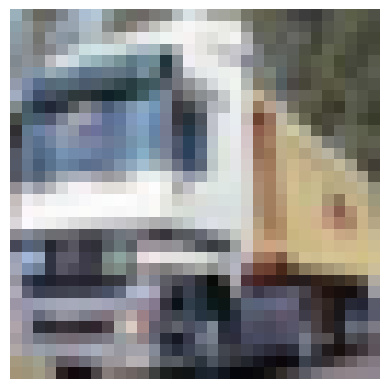

In [6]:
plt.imshow(X_train[1])
plt.axis('off')
plt.show()

Scaling the images

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
input_shape = X_train[1].shape
input_shape

(32, 32, 3)

One hot encoding for the labels

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_test.shape,y_train.shape

((10000, 10), (50000, 10))

Building the model

In [10]:
from keras.api._v2.keras import layers
model = keras.Sequential([
  keras.Input(shape=input_shape),
  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
  layers.Dropout(0.5),
  layers.BatchNormalization(),
  layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(filters=1024,kernel_size=(3,3),activation='relu',padding='same'),
  layers.Dropout(0.5),
  layers.BatchNormalization(),
  layers.Dense(1024,activation='relu'),
  layers.Flatten(),
  layers.Dense(512,activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(10,activation='softmax'),
])

Model Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

Fitting the model

In [12]:
batch_size = 64
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_fit=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
704/704 [==============================] - 300s 384ms/step - loss: 1.3951 - accuracy: 0.4928 - val_loss: 1.2857 - val_accuracy: 0.5504
Epoch 2/20
704/704 [==============================] - 269s 383ms/step - loss: 0.9893 - accuracy: 0.6505 - val_loss: 0.9097 - val_accuracy: 0.6888
Epoch 3/20
704/704 [==============================] - 269s 382ms/step - loss: 0.9449 - accuracy: 0.6680 - val_loss: 0.8499 - val_accuracy: 0.7036
Epoch 4/20
704/704 [==============================] - 270s 383ms/step - loss: 0.7727 - accuracy: 0.7293 - val_loss: 0.7561 - val_accuracy: 0.7400
Epoch 5/20
704/704 [==============================] - 267s 380ms/step - loss: 0.6521 - accuracy: 0.7726 - val_loss: 0.7428 - val_accuracy: 0.7540
Epoch 6/20
704/704 [==============================] - 270s 383ms/step - loss: 0.5778 - accuracy: 0.7983 - val_loss: 0.7403 - val_accuracy: 0.7674
Epoch 7/20
704/704 [==============================] - 269s 382ms/step - loss: 0.4871 - accuracy: 0.8294 - val_loss: 0.6829 -

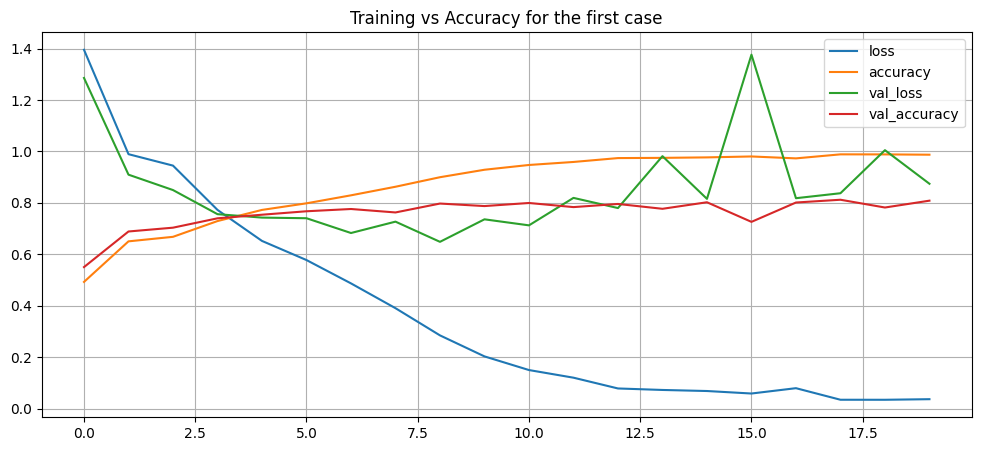

In [13]:
pd.DataFrame(history_fit.history).plot(figsize=(12,5))
plt.grid(True)
plt.title("Training vs Accuracy for the first case")
plt.show()

Evaluating the model

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9163633584976196
Test accuracy: 0.7989000082015991


**Problem-2**

Building the model

In [15]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dropout_layer = tf.keras.layers.Dropout(0.5)
prediction_layer = tf.keras.layers.Dense(10,activation='softmax')
model_1 = tf.keras.Sequential([ base_model,  global_average_layer,  dropout_layer,  prediction_layer ])

58889256/58889256 [==============================] - 4s 0us/step


Fitting the model

In [19]:
batch_size = 64
epochs = 20
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_fit_1=model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
704/704 [==============================] - 10s 13ms/step - loss: 1.5068 - accuracy: 0.4772 - val_loss: 1.3296 - val_accuracy: 0.5454
Epoch 2/20
704/704 [==============================] - 9s 13ms/step - loss: 1.4996 - accuracy: 0.4793 - val_loss: 1.3250 - val_accuracy: 0.5458
Epoch 3/20
704/704 [==============================] - 9s 12ms/step - loss: 1.4960 - accuracy: 0.4790 - val_loss: 1.3259 - val_accuracy: 0.5550
Epoch 4/20
704/704 [==============================] - 9s 13ms/step - loss: 1.5030 - accuracy: 0.4780 - val_loss: 1.3227 - val_accuracy: 0.5532
Epoch 5/20
704/704 [==============================] - 9s 12ms/step - loss: 1.4989 - accuracy: 0.4830 - val_loss: 1.3232 - val_accuracy: 0.5550
Epoch 6/20
704/704 [==============================] - 8s 12ms/step - loss: 1.5029 - accuracy: 0.4770 - val_loss: 1.3220 - val_accuracy: 0.5548
Epoch 7/20
704/704 [==============================] - 8s 12ms/step - loss: 1.4986 - accuracy: 0.4793 - val_loss: 1.3255 - val_accuracy: 0.555

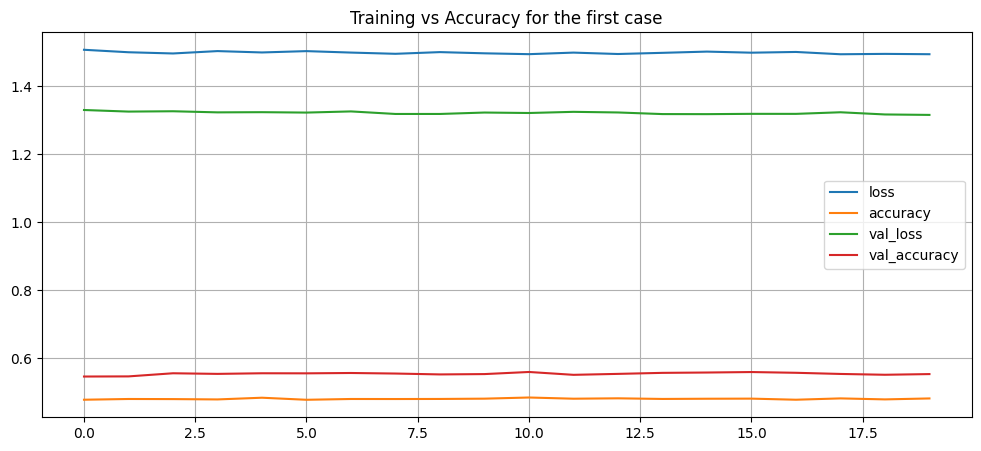

In [20]:
pd.DataFrame(history_fit_1.history).plot(figsize=(12,5))
plt.grid(True)
plt.title("Training vs Accuracy for the first case")
plt.show()

Evaluating the model

In [21]:
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_1[0])
print("Test accuracy:", score_1[1])

Test loss: 1.3532030582427979
Test accuracy: 0.5404000282287598
